<a href="https://colab.research.google.com/github/VanshShah18/BCSE331L-EDA-22BDS0321/blob/main/22BDS0321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0) Setup (libraries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set()  # default seaborn style


1) Load Data

In [2]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/penguins_size.csv"
df = pd.read_csv(url)
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2) Dimensions

In [3]:
df.shape, df.columns.tolist()


((344, 7),
 ['species',
  'island',
  'culmen_length_mm',
  'culmen_depth_mm',
  'flipper_length_mm',
  'body_mass_g',
  'sex'])

3) Quick Info & Summary Statistics

In [4]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,4,Adelie,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,343,3,Biscoe,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,341.0,NaN,NaN,NaN,200.8739,14.061585,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,334,3,MALE,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4) Missing Values & Basic Data Handling

In [5]:
df.isnull().sum()
# Drop rows with NA for now
df_clean = df.dropna().copy()
df_clean.isnull().sum()


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


5) Data Types & Basic Fixes

In [6]:
# convert obvious categoricals
for col in ['species', 'island', 'sex']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

df_clean.dtypes


,0
species,category
island,category
culmen_length_mm,float64
culmen_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,category


6) Univariate Analysis

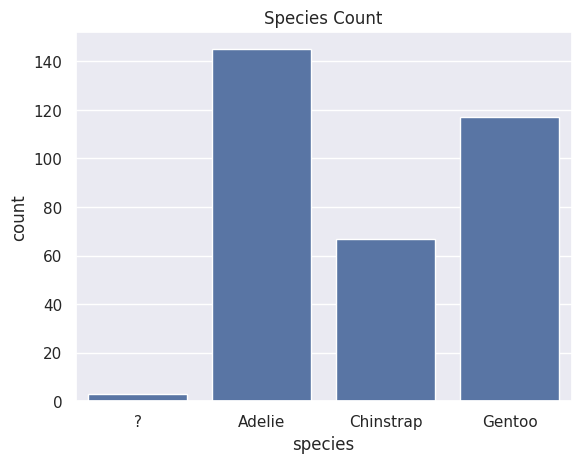

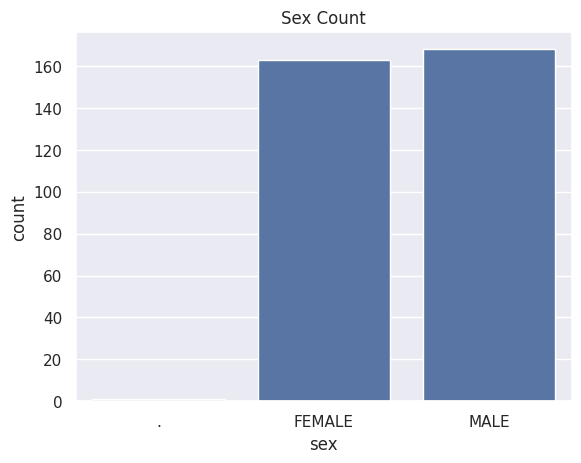

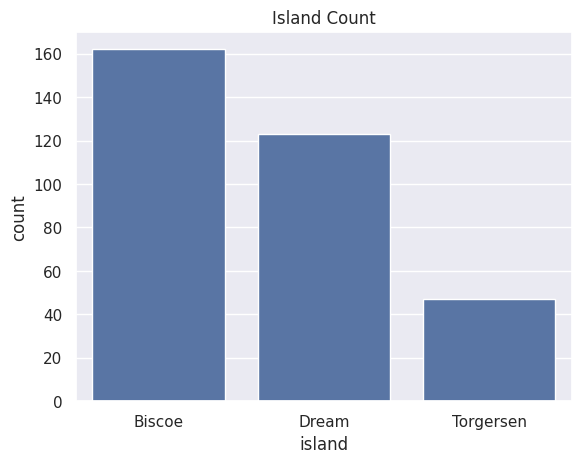

In [7]:
if 'species' in df_clean.columns:
    sns.countplot(x='species', data=df_clean)
    plt.title('Species Count')
    plt.show()

if 'sex' in df_clean.columns:
    sns.countplot(x='sex', data=df_clean)
    plt.title('Sex Count')
    plt.show()

if 'island' in df_clean.columns:
    sns.countplot(x='island', data=df_clean)
    plt.title('Island Count')
    plt.show()


Numeric distributions

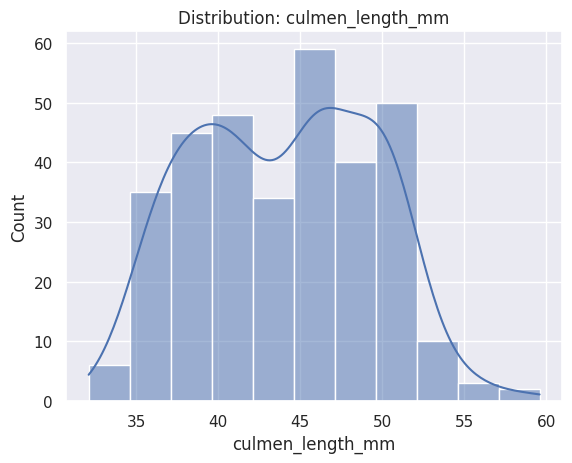

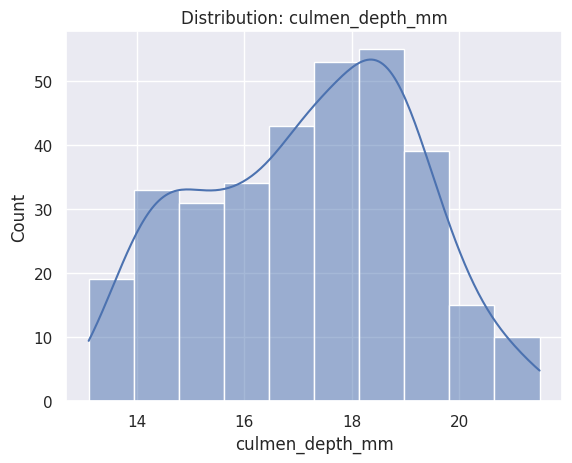

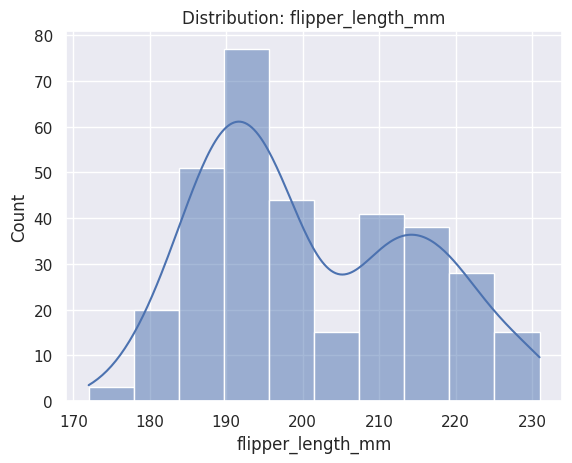

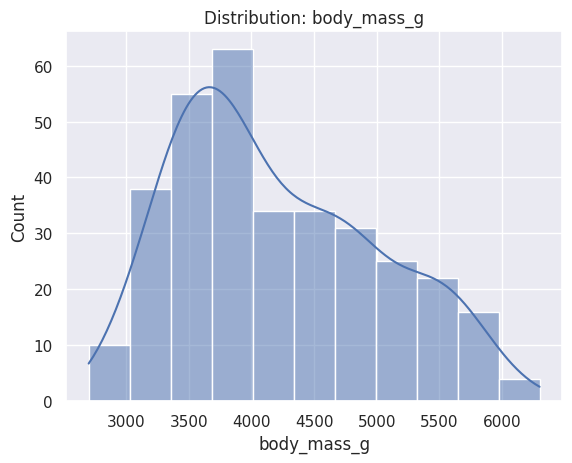

In [8]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    sns.histplot(df_clean[c], kde=True)
    plt.title(f'Distribution: {c}')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()


7) Bivariate Analysis

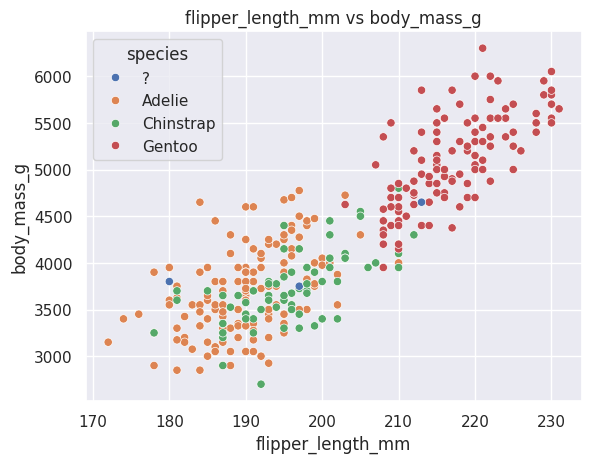

In [9]:
pairs = [
    ('flipper_length_mm', 'body_mass_g'),
    ('bill_length_mm', 'bill_depth_mm')
]
for x, y in pairs:
    if x in df_clean.columns and y in df_clean.columns:
        sns.scatterplot(data=df_clean, x=x, y=y, hue='species' if 'species' in df_clean.columns else None)
        plt.title(f'{x} vs {y}')
        plt.show()


Categorical vs Numeric

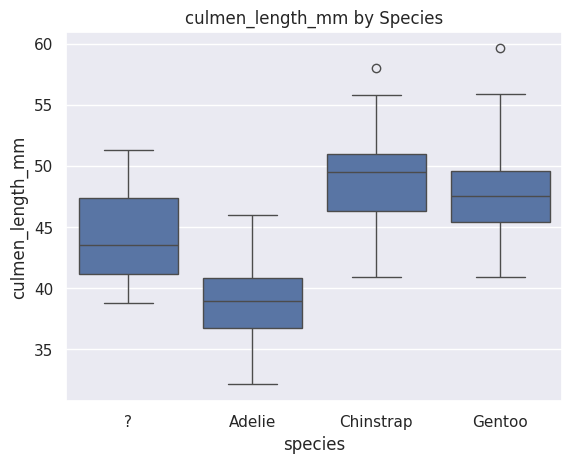

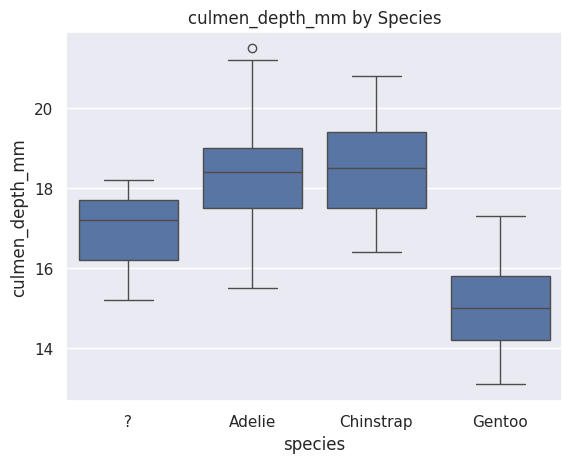

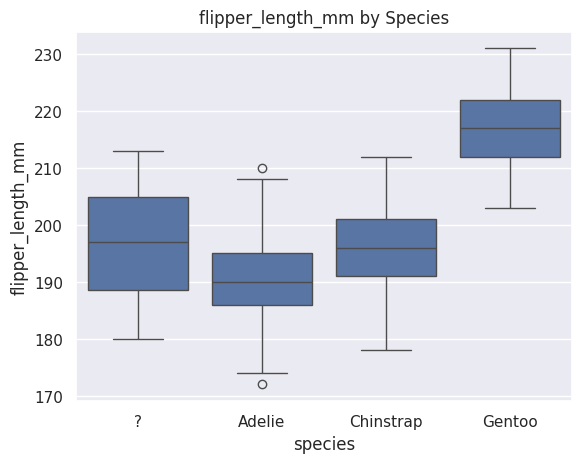

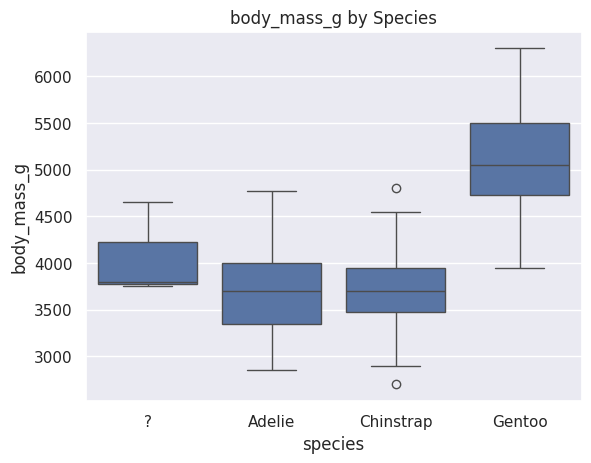

In [10]:
if 'species' in df_clean.columns:
    for c in num_cols:
        sns.boxplot(x='species', y=c, data=df_clean)
        plt.title(f'{c} by Species')
        plt.show()


8) Multivariate Analysis

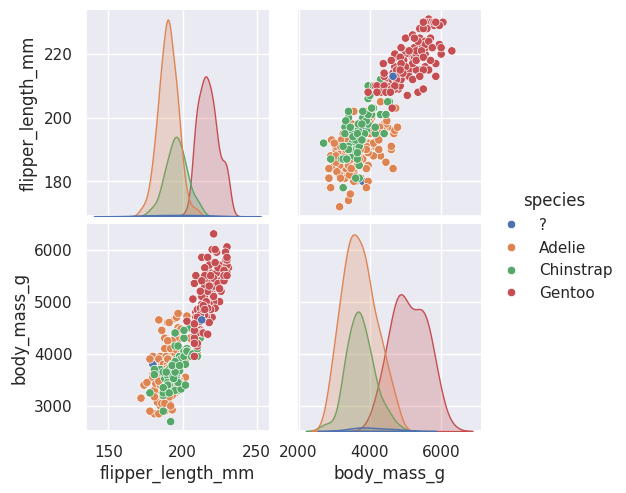

In [11]:
cols_for_pair = [c for c in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species'] if c in df_clean.columns]
if len(cols_for_pair) >= 3:
    sns.pairplot(df_clean[cols_for_pair], hue='species' if 'species' in cols_for_pair else None)


Correlation Heatmap

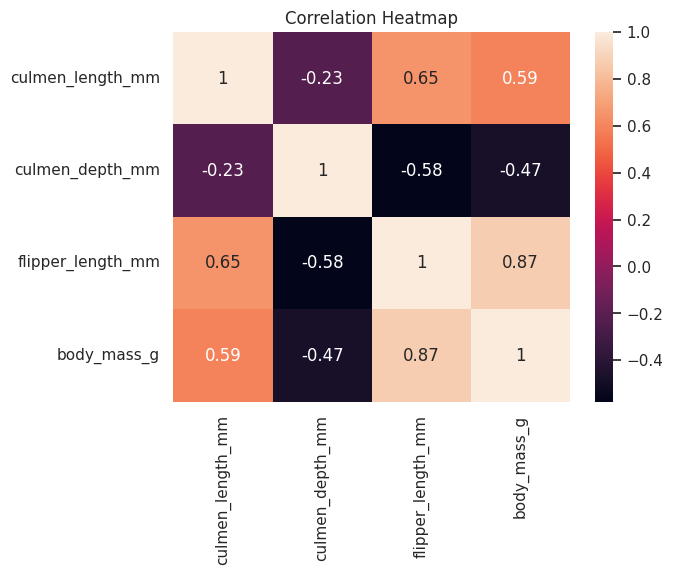

In [12]:
corr = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()
